Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

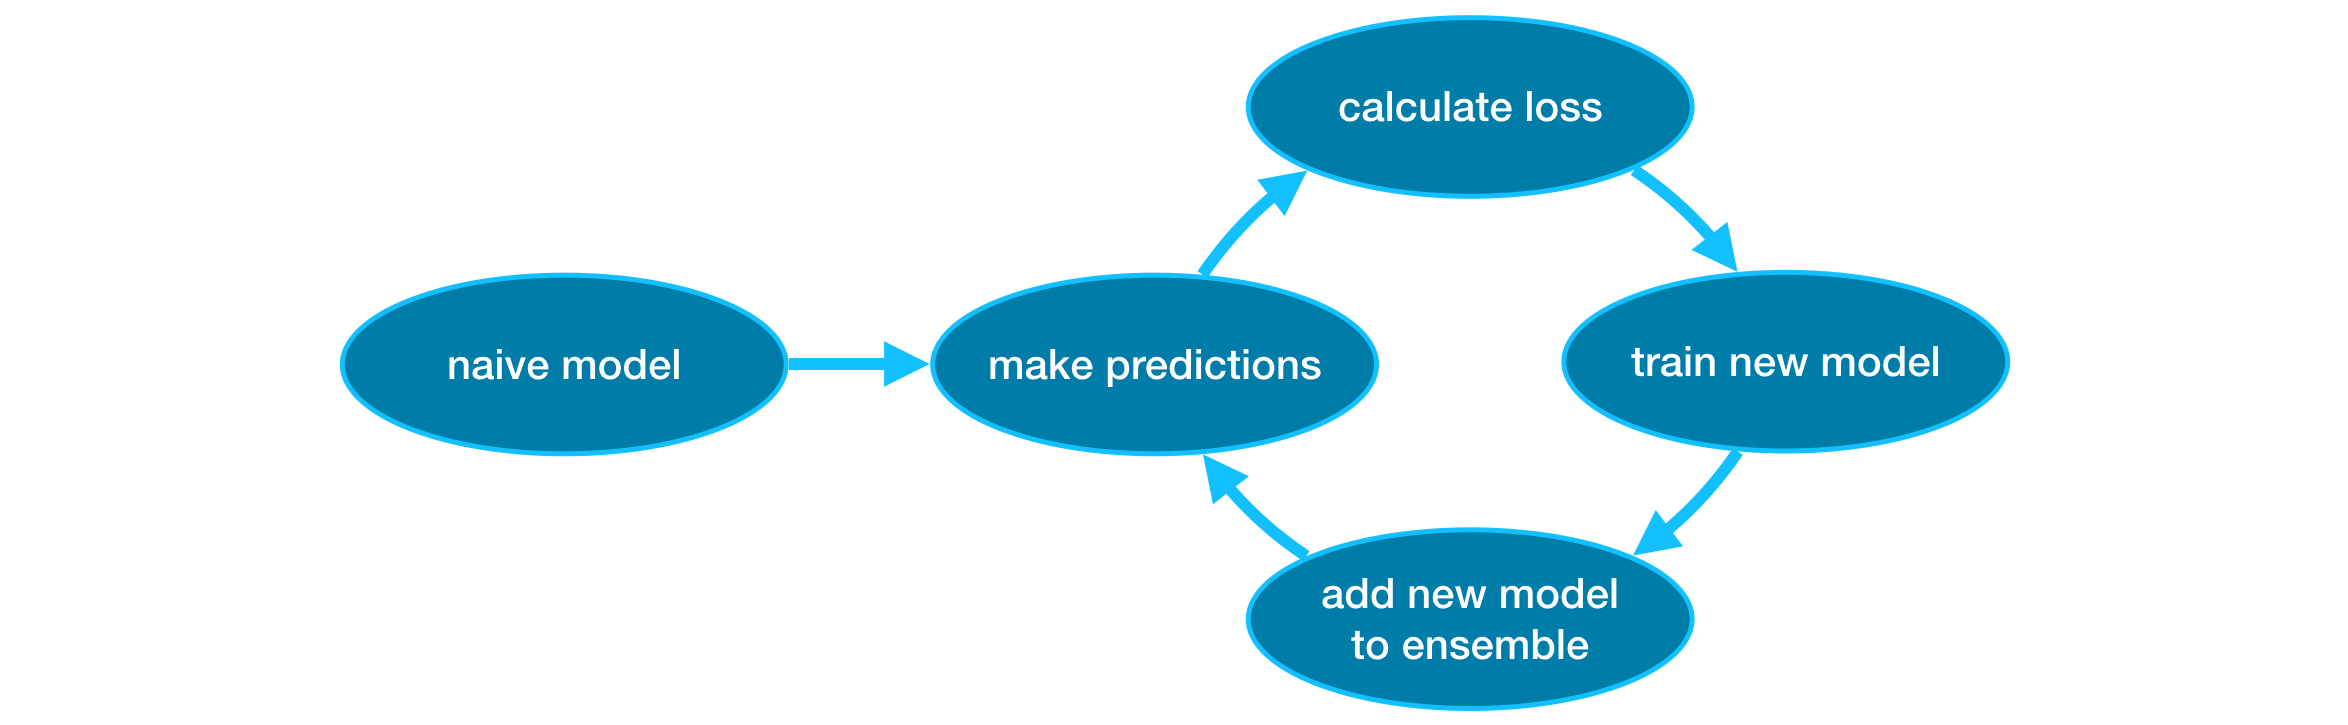

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

In [1]:
!pip install shap

In [2]:
!pip install -U xgboost

In [3]:
import pandas as pd #Untuk mengelola dan mengolah data.
import numpy as np #Untuk melakukan operasi numerik dan menangani array.
from sklearn.model_selection import train_test_split #Untuk membagi dataset menjadi data latih dan data uji.
from sklearn.metrics import mean_absolute_error #Metode untuk mengukur seberapa akurat prediksi model.
import xgboost as xgb #Untuk membangun model machine learning yang cepat dan efisien.
import matplotlib.pyplot as plt #Untuk membuat grafik dan visualisasi data.
from xgboost import XGBRegressor #Model machine learning yang digunakan untuk tugas prediksi berbasis regresi.
import shap #Untuk mengetahui fitur mana yang paling berpengaruh terhadap hasil prediksi.
from sklearn.inspection import PartialDependenceDisplay #Untuk menampilkan hubungan antara fitur dan prediksi.
from xgboost import plot_importance #Untuk menunjukkan seberapa penting setiap fitur dalam model XGBoost.
from xgboost import plot_tree #Untuk menggambarkan struktur pohon keputusan dalam model XGBoost yang telah dilatih.
from sklearn.model_selection import learning_curve #Untuk mengevaluasi kinerja model berdasarkan perubahan ukuran data latih.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [4]:
from google.colab import drive
drive.mount('/content/drive')
#Google Drive

Mounted at /content/drive


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [5]:
from google.colab import drive
drive.mount('/content/drive')
# Menghubungkan Google Drive ke Google Colab

file_path = '/content/drive/MyDrive/tugasxgboost.csv'
df = pd.read_csv(file_path)
# Membuka file CSV dan memuatnya ke dalam DataFrame

df.head()
# Menampilkan beberapa data awal dari DataFrame

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [6]:
predictors = ['X1', 'X2', 'X5', 'X6', 'X7']  #Merujuk kepada ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
target = 'Class'  #Merujuk kepada 'Price'
# Menentukan kumpulan kolom prediktor dan target

X = df[predictors]
y = df[target]
# Membuat DataFrame untuk fitur (X) dan target (y)

X.head(), y.head()
# Menampilkan lima data pertama untuk memverifikasi pemilihan yang sesuai


(     X1    X2    X5    X6    X7
 0   7.4  0.70  76.0  11.0  34.0
 1   7.8  0.88  98.0  25.0  67.0
 2   7.8  0.76  92.0  15.0  54.0
 3  11.2  0.28  75.0  17.0  60.0
 4   7.4  0.70  76.0  11.0  34.0,
 0    5
 1    5
 2    5
 3    6
 4    5
 Name: Class, dtype: int64)

**Prompt:**

Write a code cell to split the data into training and validation

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
# Membagi dataset menjadi data pelatihan dan data validasi

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape
# Menampilkan dimensi dari setiap subset data


((1279, 5), (320, 5), (1279,), (320,))

In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [8]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
# Gunakan XGBoost untuk melatih model regresi pada data pelatihan.

y_pred = model.predict(X_valid)
# Buat prediksi berdasarkan data validasi.

mae = mean_absolute_error(y_valid, y_pred)
# Hitung kesalahan absolut rata-rata antara prediksi dan nilai aktual pada data validasi.

print(f"Mean Absolute Error on the validation set: {mae:.2f}")
# Tampilkan hasil perhitungan kesalahan absolut rata-rata pada set validasi.

Mean Absolute Error on the validation set: 0.50


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [9]:
model_500 = XGBRegressor(n_estimators=500, random_state=42)
model_500.fit(X_train, y_train)
#Membangun model XGBRegressor dengan 500 pohon keputusan

y_pred_500 = model_500.predict(X_valid)
#Melakukan prediksi pada data validasi

mae_500 = mean_absolute_error(y_valid, y_pred_500)
#Menghitung error absolut rata-rata pada data validasi

print(f"Mean Absolute Error on the validation set (500 estimators): {mae_500:.2f}")
#Menampilkan nilai error absolut rata-rata

Mean Absolute Error on the validation set (500 estimators): 0.49


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [10]:
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.05, random_state=42)
# Membuat model XGBRegressor dengan nilai learning rate yang disesuaikan dan 90 estimator

model_custom.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
# Melatih model dengan data pelatihan tanpa menggunakan early stopping

y_pred_custom = model_custom.predict(X_valid)
# Membuat prediksi berdasarkan data validasi

mae_custom = mean_absolute_error(y_valid, y_pred_custom)
# Menghitung nilai error absolut rata-rata (MAE) untuk data validasi

print(f"Mean Absolute Error on the validation set (custom model): {mae_custom:.2f}")
# Menampilkan nilai MAE untuk model yang disesuaikan pada set validasi

Mean Absolute Error on the validation set (custom model): 0.52


#Feature Importance Visualization

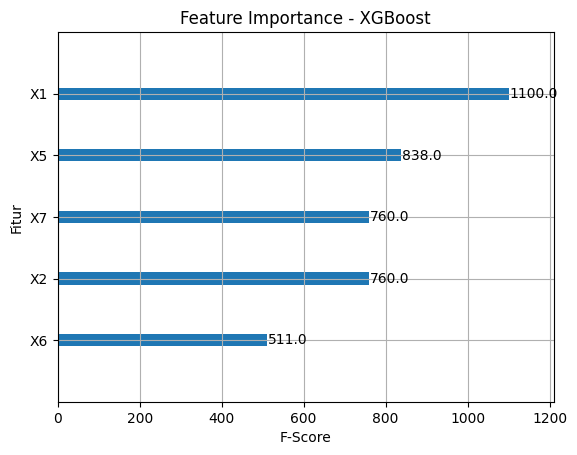

In [11]:
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.05, random_state=42)
# Membuat model XGBRegressor dengan jumlah estimator sebanyak 90 dan learning rate yang disesuaikan

model_custom.fit(X_train, y_train)
# Melatih model menggunakan data pelatihan

plot_importance(model_custom, importance_type='weight')
plt.title('Feature Importance - XGBoost')
plt.xlabel('F-Score')
plt.ylabel('Fitur')
plt.show()
# Menampilkan visualisasi pentingnya fitur pada model XGBoost


Visualisasi feature importance dari XGBoost menggambarkan sejauh mana kontribusi masing-masing fitur terhadap hasil prediksi model.

Pada sumbu vertikal tercantum nama-nama fitur, sementara sumbu horizontal menunjukkan nilai F-Score.
Panjang batang mencerminkan pentingnya setiap fitur: semakin panjang batang, semakin sering fitur tersebut digunakan dalam pohon keputusan yang dibentuk oleh model, yang menandakan pengaruhnya yang signifikan terhadap prediksi.
Visualisasi ini sangat berguna untuk mengidentifikasi fitur-fitur utama yang berperan dalam meningkatkan akurasi model serta memberikan pemahaman tentang faktor-faktor penting dalam dataset.

#Tree Structure Visualization

<Figure size 5000x2000 with 0 Axes>

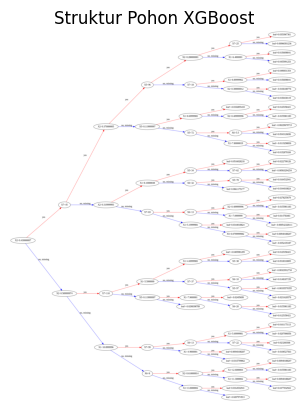

In [12]:
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.05, random_state=42)
model_custom.fit(X_train, y_train)
# Mentraining model XGBoost dengan parameter yang sudah ditentukan.

plt.figure(figsize=(50, 20))
plot_tree(model_custom, num_trees=0, rankdir='LR')
plt.title('Struktur Pohon XGBoost')
plt.show()
# Menampilkan visualisasi struktur pohon dari model XGBoost

Visualisasi struktur pohon XGBoost menggambarkan bagaimana model mengambil keputusan dalam memprediksi nilai target.

Setiap node menggambarkan aturan pemisahan yang didasarkan pada fitur tertentu dan nilai pemisahan. Cabang-cabang menunjukkan keputusan yang diambil berdasarkan hasil pemisahan tersebut. Daun (leaf nodes) menampilkan hasil prediksi akhir. Dengan visualisasi ini, kita dapat memahami logika model secara lebih jelas dan meningkatkan transparansi dengan menunjukkan bagaimana fitur-fitur digunakan dalam proses prediksi.

#Learning Curve Visualization

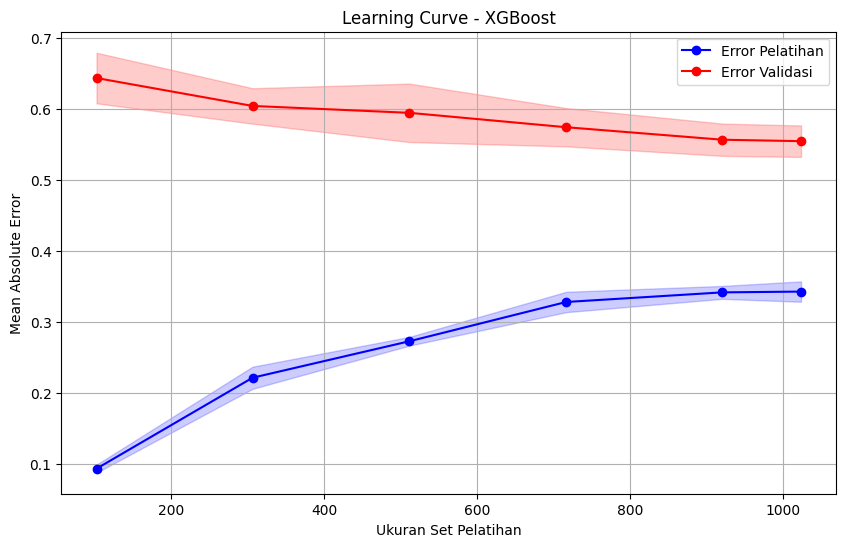

In [13]:
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.05, random_state=42)
model_custom.fit(X_train, y_train)
# Melatih model XGBoost dengan parameter yang ditentukan.

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=model_custom,
    X=X_train,
    y=y_train,
    train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    cv=5,
    scoring='neg_mean_absolute_error'
)
# Menghasilkan data learning curve dengan mengevaluasi kinerja pada ukuran dataset pelatihan yang berbeda.

train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = -valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)
# Menghitung rata-rata dan deviasi standar dari skor pelatihan dan validasi.

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Error Pelatihan')
plt.plot(train_sizes, valid_mean, 'o-', color='red', label='Error Validasi')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
# Memvisualisasikan learning curve, termasuk rentang error.

plt.title('Learning Curve - XGBoost')
plt.xlabel('Ukuran Set Pelatihan')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid()
plt.show()


Learning curve menggambarkan kinerja model XGBoost pada data pelatihan dan validasi seiring dengan bertambahnya jumlah data pelatihan. Grafik ini membantu untuk mengevaluasi apakah model mengalami overfitting atau underfitting.

Jika error pada data pelatihan rendah tetapi error pada data validasi tinggi, ini menunjukkan model cenderung overfitting. Jika error pada data pelatihan dan validasi keduanya tinggi, model kemungkinan besar underfitting. Grafik ini juga memberikan gambaran tentang saat performa model mulai stabil, serta kapan penambahan data tidak lagi memberikan peningkatan signifikan, yang dapat membantu dalam menentukan ukuran dataset yang optimal.


#Shap Values Visualization

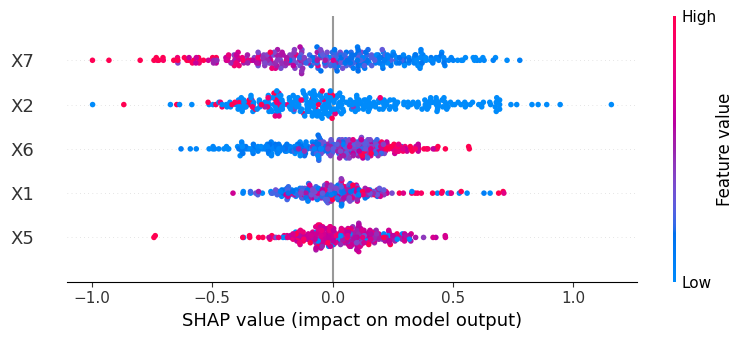

In [14]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_valid)
# Menginisialisasi objek SHAP explainer

shap.summary_plot(shap_values, X_valid)
# Menampilkan grafik dari nilai SHAP

Visualisasi nilai SHAP memperlihatkan sejauh mana setiap fitur mempengaruhi prediksi dari model XGBoost dan dalam arah apa pengaruh tersebut terjadi.

Pada summary plot SHAP:

- Setiap titik merepresentasikan satu observasi untuk satu fitur.
- Sumbu horizontal menggambarkan besar pengaruh fitur terhadap prediksi, sedangkan warna titik menunjukkan nilai fitur (dari rendah ke tinggi).
  
Plot ini memudahkan untuk mengidentifikasi fitur yang paling berpengaruh serta bagaimana kontribusinya (apakah positif atau negatif) terhadap prediksi. Visualisasi ini membantu memberikan transparansi dan memudahkan pemahaman terhadap model machine learning yang kompleks.

#Partial Dependence Plot Visualization

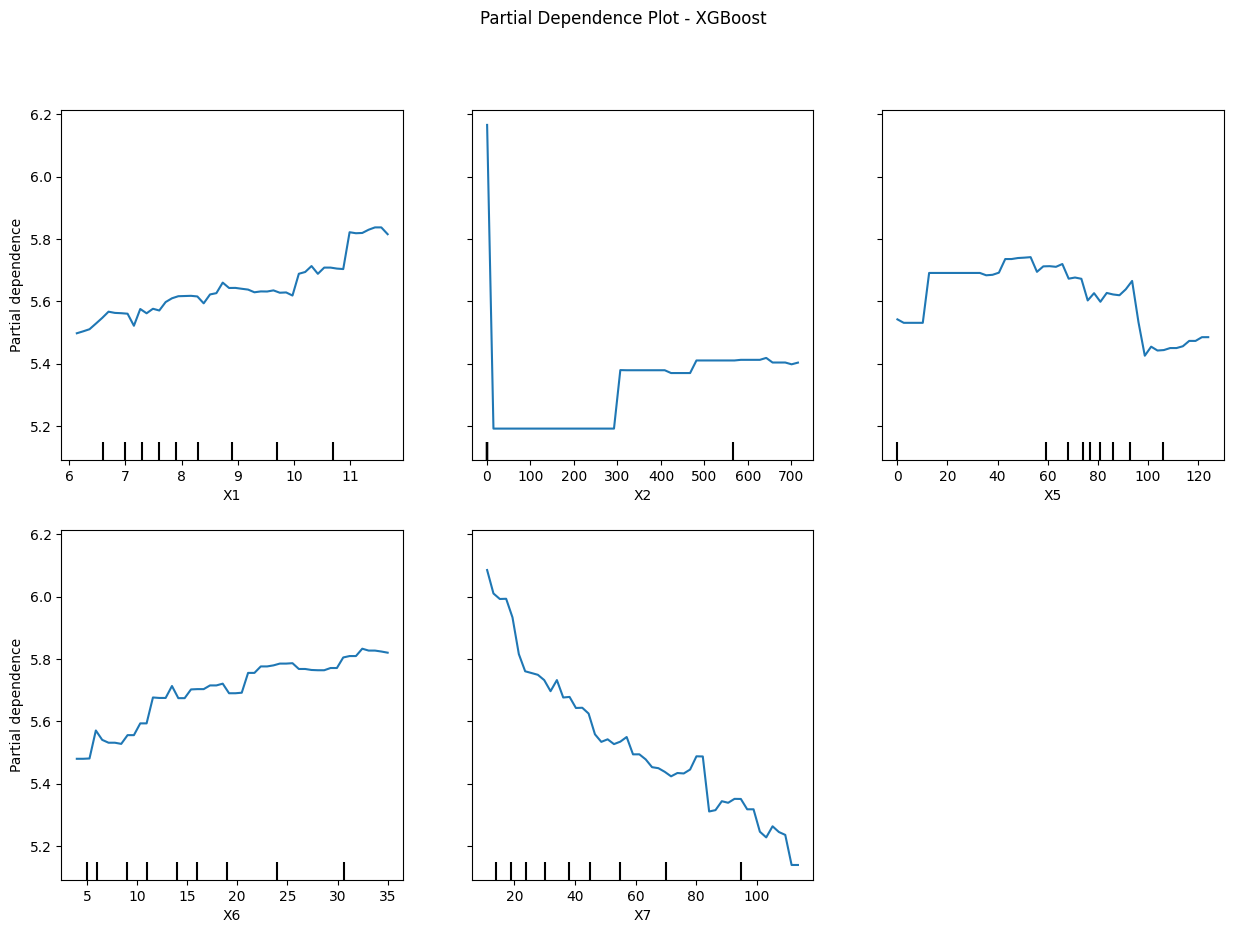

In [15]:
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.05, random_state=42)
model_custom.fit(X_train, y_train)
#Mentraining model XGBoost.

fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    model_custom,
    X_train,
    features=[0, 1, 2, 3, 4],
    grid_resolution=50,
    ax=ax
)
plt.suptitle('Partial Dependence Plot - XGBoost')
plt.show()
#Membuat grafik partial dependence plot


Partial Dependence Plot (PDP) menggambarkan hubungan antara fitur tertentu dan prediksi model XGBoost dengan mengisolasi efek dari fitur lainnya.

Sumbu horizontal menggambarkan nilai fitur, sementara sumbu vertikal menunjukkan pengaruh rata-rata fitur tersebut terhadap hasil prediksi. Garis pada plot menggambarkan bagaimana perubahan nilai fitur mempengaruhi prediksi, baik dalam arah positif maupun negatif. PDP sangat berguna untuk mengidentifikasi pola linier atau non-linier antara fitur dan prediksi, serta memberikan wawasan yang lebih mendalam mengenai bagaimana model merespon perubahan pada nilai fitur tertentu.